In [14]:
import os
import sys
import nltk
import gensim
import re
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from gensim import corpora
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [15]:
listFileName = [fileName for fileName in os.listdir(os.getcwd()+"/500MNTNews/") if ".txt" in str(fileName)]


In [16]:
listFileName

['1000.txt',
 '11359.txt',
 '11377.txt',
 '1149.txt',
 '11557.txt',
 '1162.txt',
 '1178.txt',
 '1197.txt',
 '1225.txt',
 '1232.txt',
 '1233.txt',
 '13476.txt',
 '13782.txt',
 '13930.txt',
 '14188.txt',
 '149279.txt',
 '14979.txt',
 '15109.txt',
 '15569.txt',
 '15603.txt',
 '15768.txt',
 '1593.txt',
 '16011.txt',
 '1627.txt',
 '16422.txt',
 '1650.txt',
 '16601.txt',
 '16626.txt',
 '17114.txt',
 '17202.txt',
 '17237.txt',
 '17639.txt',
 '17889.txt',
 '18340.txt',
 '1850.txt',
 '1891.txt',
 '1893.txt',
 '1910.txt',
 '1919.txt',
 '1935.txt',
 '1940.txt',
 '19421.txt',
 '19459.txt',
 '195039.txt',
 '1960.txt',
 '1996.txt',
 '2041.txt',
 '2045.txt',
 '205433.txt',
 '20886.txt',
 '22884.txt',
 '237827.txt',
 '24456.txt',
 '246.txt',
 '251898.txt',
 '25440.txt',
 '25584.txt',
 '256151.txt',
 '256400.txt',
 '256429.txt',
 '256497.txt',
 '256506.txt',
 '256568.txt',
 '256604.txt',
 '256675.txt',
 '256684.txt',
 '256802.txt',
 '256876.txt',
 '256893.txt',
 '256895.txt',
 '256924.txt',
 '25697.txt

In [38]:
##Removing.txt
listFileName = [os.path.splitext(each)[0] for each in listFileName]
listFileName

['1000',
 '11359',
 '11377',
 '1149',
 '11557',
 '1162',
 '1178',
 '1197',
 '1225',
 '1232',
 '1233',
 '13476',
 '13782',
 '13930',
 '14188',
 '149279',
 '14979',
 '15109',
 '15569',
 '15603',
 '15768',
 '1593',
 '16011',
 '1627',
 '16422',
 '1650',
 '16601',
 '16626',
 '17114',
 '17202',
 '17237',
 '17639',
 '17889',
 '18340',
 '1850',
 '1891',
 '1893',
 '1910',
 '1919',
 '1935',
 '1940',
 '19421',
 '19459',
 '195039',
 '1960',
 '1996',
 '2041',
 '2045',
 '205433',
 '20886',
 '22884',
 '237827',
 '24456',
 '246',
 '251898',
 '25440',
 '25584',
 '256151',
 '256400',
 '256429',
 '256497',
 '256506',
 '256568',
 '256604',
 '256675',
 '256684',
 '256802',
 '256876',
 '256893',
 '256895',
 '256924',
 '25697',
 '256991',
 '257020',
 '257021',
 '257032',
 '257092',
 '257145',
 '257169',
 '257272',
 '257290',
 '257352',
 '257528',
 '257622',
 '257675',
 '257678',
 '257703',
 '257713',
 '264304',
 '264313',
 '264317',
 '264759',
 '264801',
 '264845',
 '264962',
 '265017',
 '265062',
 '265101',

In [17]:
# Tokenizer 
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words("english")


# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer("english")


In [18]:
## building the corpus topic modelling 
texts = []
topicsAppend = []
globalWordRaw = []
globalWordList = []
pertopic = []
listwords = []
index = 0
for file in listFileName:    
    filepath = open(os.getcwd()+"/500MNTNews/"+file, encoding="utf8")
    i = filepath.read()
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]    
    # stem tokens
    stemmed_tokens = [s_stemmer.stem(i) for i in stopped_tokens]    
    # add tokens to list
    texts.append(stemmed_tokens)
    filepath.close()
    # start topic modelling process
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word = dictionary, passes=1)
    topicsAppend.append(ldamodel.print_topics(num_topics=1, num_words=30))
    tmplistwords = re.findall(r'\"[\w+]+\"',topicsAppend[index][0][1])
    index = index + 1
    for x in listwords:
        pertopic.append(x)
    globalWordRaw.append(" ".join(pertopic))
    listwords = [i.replace('"', '') for i in tmplistwords]
    globalWordList.append(listwords)
    texts = []
    pertopic = []
    listwords = []


In [19]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.004*"depress" + 0.003*"minor" + 0.003*"major" + 0.003*"studi" + 0.003*"univers" + 0.003*"disord" + 0.003*"psychiatri" + 0.003*"treatment" + 0.003*"symptom" + 0.003*"co" + 0.003*"one" + 0.003*"ssri" + 0.003*"patient" + 0.003*"judd" + 0.003*"nimh"')
(1, '0.004*"depress" + 0.004*"minor" + 0.004*"studi" + 0.003*"major" + 0.003*"univers" + 0.003*"disord" + 0.003*"symptom" + 0.003*"psychiatri" + 0.003*"nimh" + 0.003*"treatment" + 0.003*"co" + 0.003*"one" + 0.003*"patient" + 0.003*"signific" + 0.003*"judd"')
(2, '0.004*"depress" + 0.004*"studi" + 0.004*"major" + 0.004*"minor" + 0.004*"disord" + 0.003*"univers" + 0.003*"treatment" + 0.003*"psychiatri" + 0.003*"symptom" + 0.003*"author" + 0.003*"signific" + 0.003*"judd" + 0.003*"patient" + 0.003*"nimh" + 0.003*"nation"')
(3, '0.004*"depress" + 0.004*"studi" + 0.003*"minor" + 0.003*"major" + 0.003*"symptom" + 0.003*"univers" + 0.003*"nimh" + 0.003*"psychiatri" + 0.003*"disord" + 0.003*"judd" + 0.003*"patient" + 0.003*"one" + 0.003*"treatm

In [20]:
!pip install pyLDAvis

smart-open 1.7.1 requires bz2file, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pyLDAvis
lda3 = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [21]:
# Build topic modeling for individual documents in the corpus
texts = []
for file in listFileName:    
    filepath = open(os.getcwd()+"/500MNTNews/"+file, encoding="utf8")
    i = filepath.read()
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]  
    stemmed_tokens = [s_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
    filepath.close()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word = dictionary, passes=1)
tmpglobalTopic = re.findall(r'\"[\w+]+\"',ldamodel.print_topics(num_topics=1, num_words=30)[0][1])
globalTopic = [i.replace('"', '') for i in tmpglobalTopic]
print(ldamodel.print_topics(num_topics=1, num_words=30))


[(0, '0.012*"studi" + 0.011*"research" + 0.008*"cancer" + 0.006*"health" + 0.006*"risk" + 0.006*"depress" + 0.005*"diabet" + 0.005*"patient" + 0.005*"may" + 0.005*"also" + 0.004*"diseas" + 0.004*"children" + 0.004*"use" + 0.004*"peopl" + 0.004*"effect" + 0.004*"increas" + 0.004*"univers" + 0.004*"found" + 0.004*"treatment" + 0.004*"said" + 0.004*"level" + 0.003*"associ" + 0.003*"year" + 0.003*"one" + 0.003*"high" + 0.003*"find" + 0.003*"percent" + 0.003*"food" + 0.003*"develop" + 0.003*"diet"')]


In [22]:
#Build feature set for our model
globalVector = []
globalTopicVector = []
for g2 in globalWordList:
    common = set(globalTopic).intersection(g2)
    common_new = list(common)
    tmpVector = [] 
    count =0
    for x in globalTopic:
        try: 
            common_new.index(x) 
            count+=1
            tmpVector.append(count) 
        except: 
            tmpVector.append(0)
    globalVector.append(tmpVector)
    globalTopicVector.append(len(common_new))
    tmpVector = []





In [23]:
listFileName = [os.path.splitext(each)[0] for each in listFileName]
article_id=listFileName


In [24]:
mydf = pd.DataFrame(globalVector, columns=globalTopic)
traindf = mydf

In [25]:

traindf['article_id'] = listFileName
traindf['article_id']=traindf['article_id'].astype(str).astype(int)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
studi         500 non-null int64
research      500 non-null int64
cancer        500 non-null int64
health        500 non-null int64
risk          500 non-null int64
depress       500 non-null int64
diabet        500 non-null int64
patient       500 non-null int64
may           500 non-null int64
also          500 non-null int64
diseas        500 non-null int64
children      500 non-null int64
use           500 non-null int64
peopl         500 non-null int64
effect        500 non-null int64
increas       500 non-null int64
univers       500 non-null int64
found         500 non-null int64
treatment     500 non-null int64
said          500 non-null int64
level         500 non-null int64
associ        500 non-null int64
year          500 non-null int64
one           500 non-null int64
high          500 non-null int64
find          500 non-null int64
percent       500 non-null int64
food

In [26]:
shockingWords = ["surpris", "astonish", "howev", "unexpect", "amaz", "shock", "astound"]

In [27]:
#Build suprise feature set for our model
SupriseVector = []
globalTopicVector = []
for g2 in texts:
    common = set(shockingWords).intersection(g2)
    common_new = list(common)
    tmpVector = [] 
    count =0
    for x in shockingWords:
        try: 
            common_new.index(x) 
            count+=1
            tmpVector.append(count) 
        except: 
            tmpVector.append(0)
    SupriseVector.append(tmpVector)
    globalTopicVector.append(len(common_new))
    tmpVector = []





In [28]:
surpisedf = pd.DataFrame(SupriseVector, columns=shockingWords, index=article_id)
surpisedf['article_id'] = listFileName
surpisedf['article_id']=surpisedf['article_id'].astype(str).astype(int)
#surpisedf
surpisedf.dtypes

surpris       int64
astonish      int64
howev         int64
unexpect      int64
amaz          int64
shock         int64
astound       int64
article_id    int32
dtype: object

In [29]:
labelsUser1df = pd.read_csv("FinalProject.csv")#, index_col="article_id")
labelsUser1df.dtypes

article_id             int64
link                  object
title                 object
main_category         object
category_1            object
category_2            object
category_3            object
category_4            object
suprise_r1             int64
suprise_r2             int64
suprise_r3             int64
like_r1                int64
like_r2                int64
like_r3                int64
c1_familiarity_r1      int64
c1_familiarity_r2      int64
c1_familiarity_r3      int64
c2_familiarity_r1    float64
c2_familiarity_r2    float64
c2_familiarity_r3    float64
c3_familiarity_r1    float64
c3_familiarity_r2    float64
c3_familiarity_r3    float64
c4_familiarity_r1    float64
c4_familiarity_r2    float64
c4_familiarity_r3    float64
dtype: object

In [30]:
frames = [traindf,surpisedf,labelsUser1df]
result1 = pd.merge(labelsUser1df,
                 surpisedf,
                 on='article_id')
result = pd.merge(result1,
                 traindf,
                 on='article_id')
result['average_suprise']=((result.suprise_r1 + result.suprise_r2 + result.suprise_r3)/3)
result.head()

,article_id,link,title,main_category,category_1,category_2,category_3,category_4,suprise_r1,suprise_r2,...,associ,year,one,high,find,percent,food,develop,diet,average_suprise
0,9432,http://www.medicalnewstoday.com/articles/14131...,Depression also a problem in patients with Par...,Depression,Depression,NaN,NaN,NaN,3,1,...,0,0,0,0,0,0,0,0,0,2.333333
1,17114,http://www.medicalnewstoday.com/articles/23226...,Testing new manic depression drugs in slime mo...,Depression,Depression,NaN,NaN,NaN,5,5,...,0,0,0,0,0,0,0,6,0,4.666667
2,388,http://www.medicalnewstoday.com/articles/4063.php,Dietary cocktail reduces cancer deaths,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,5,...,0,9,0,0,0,0,0,0,10,3.666667
3,1650,http://www.medicalnewstoday.com/articles/5331.php,Super smoking addicts see cigarettes as their pal,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,1.000000
4,1850,http://www.medicalnewstoday.com/articles/5533.php,How to reduce your chances of developing colon...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,3,3,...,0,0,0,7,0,0,0,8,9,2.333333


In [213]:
result['average_surprise']=((result.suprise_r1 + result.suprise_r2 + result.suprise_r3)/3).astype(int)
result['average_like']=((result.like_r1 + result.like_r2 + result.like_r3)/3).astype(int)
result.head()

,article_id,link,title,main_category,category_1,category_2,category_3,category_4,suprise_r1,suprise_r2,...,one,high,find,percent,food,develop,diet,average_suprise,average_surprise,average_like
0,9432,http://www.medicalnewstoday.com/articles/14131...,Depression also a problem in patients with Par...,Depression,Depression,NaN,NaN,NaN,3,1,...,0,0,0,0,0,0,0,2.333333,2,3
1,17114,http://www.medicalnewstoday.com/articles/23226...,Testing new manic depression drugs in slime mo...,Depression,Depression,NaN,NaN,NaN,5,5,...,0,0,0,0,0,6,0,4.666667,4,4
2,388,http://www.medicalnewstoday.com/articles/4063.php,Dietary cocktail reduces cancer deaths,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,5,...,0,0,0,0,0,0,10,3.666667,3,4
3,1650,http://www.medicalnewstoday.com/articles/5331.php,Super smoking addicts see cigarettes as their pal,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,1.000000,1,2
4,1850,http://www.medicalnewstoday.com/articles/5533.php,How to reduce your chances of developing colon...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,3,3,...,0,7,0,0,0,8,9,2.333333,2,4


In [214]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 66 columns):
article_id           500 non-null int64
link                 500 non-null object
title                500 non-null object
main_category        500 non-null object
category_1           500 non-null object
category_2           401 non-null object
category_3           251 non-null object
category_4           110 non-null object
suprise_r1           500 non-null int64
suprise_r2           500 non-null int64
suprise_r3           500 non-null int64
like_r1              500 non-null int64
like_r2              500 non-null int64
like_r3              500 non-null int64
c1_familiarity_r1    500 non-null int64
c1_familiarity_r2    500 non-null int64
c1_familiarity_r3    500 non-null int64
c2_familiarity_r1    401 non-null float64
c2_familiarity_r2    401 non-null float64
c2_familiarity_r3    401 non-null float64
c3_familiarity_r1    251 non-null float64
c3_familiarity_r2    251 non-null float6

In [215]:
second = pd.read_csv("newcsv.csv")
second.isnull().sum()

article_id             0
link                   0
title                  0
main_category          0
category_1             0
category_2           297
category_3           747
category_4          1170
surprise_ratings       0
like_ratings           0
c1_familiarity         0
c2_familiarity       297
c3_familiarity       747
c4_familiarity      1170
surpris                0
astonish               0
howev                  0
unexpect               0
amaz                   0
shock                  0
astound                0
studi                  0
research               0
cancer                 0
health                 0
risk                   0
depress                0
diabet                 0
patient                0
may                    0
also                   0
diseas                 0
children               0
use                    0
peopl                  0
effect                 0
increas                0
univers                0
found                  0
treatment              0


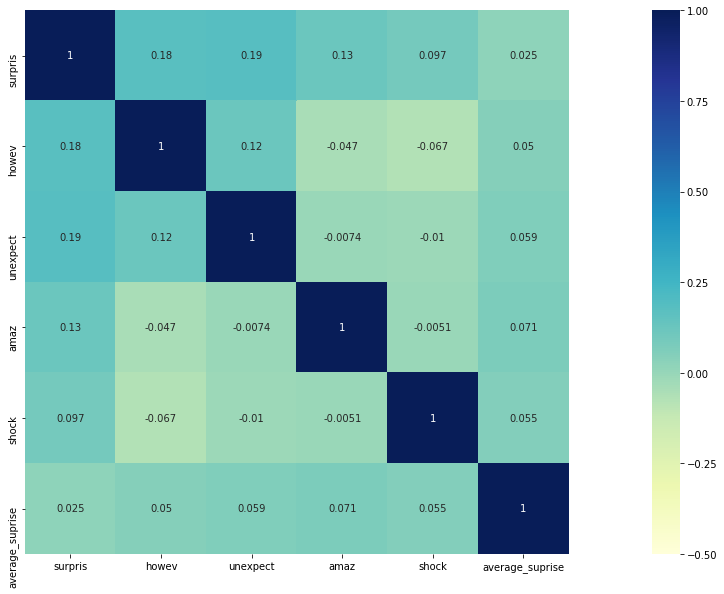

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmatr = result[["surpris","howev","unexpect","amaz","shock","average_suprise"]].corr()
corrmatr
#cmap = sns.diverging_palette(30,10, as_cmap=True)
#mask= np.zeros_like(corrmatr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrmatr,cmap="YlGnBu",vmin=-0.5,square=True,annot=True)

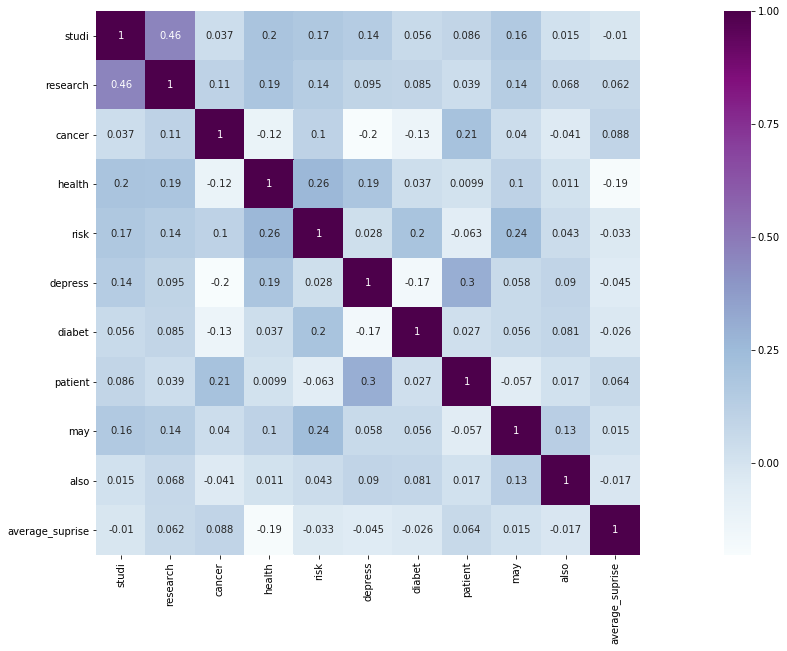

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmatr = result[["studi","research","cancer","health","risk","depress","diabet","patient","may","also","average_suprise"]].corr()
corrmatr
#mask= np.zeros_like(corrmatr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrmatr,cmap="BuPu",vmax=1,square=True,annot=True)

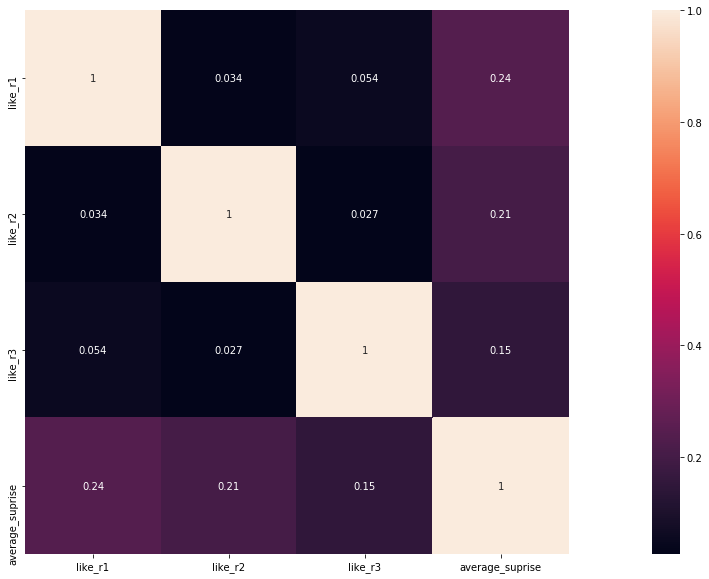

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmatr = result[["like_r1","like_r2","like_r3","average_suprise"]].corr()
corrmatr
#mask= np.zeros_like(corrmatr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
cmap= sns.diverging_palette(220, 20, sep=20, as_cmap=True)
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrmatr,vmax=1,square=True,annot=True)

In [216]:
train = result.sample(frac = .70)
test = result.sample(frac = .30)

In [217]:
x_test=test[["average_surprise"]].values

In [219]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["average_like"]].values, train[["average_surprise"]].values)  
y_pred = classifier.predict(test[["average_like"]].values)  

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [220]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2])

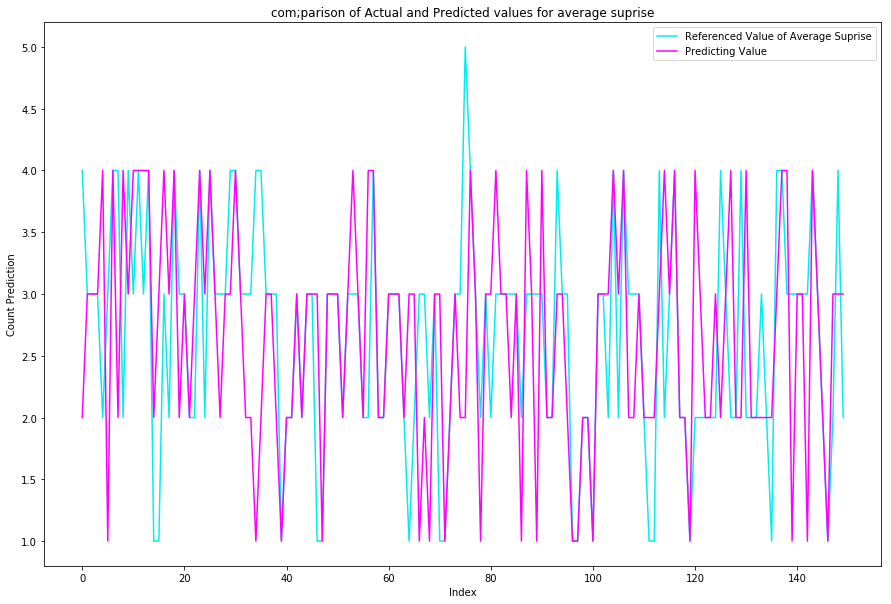

In [185]:
plt.figure(figsize=(15,10))
plt.title('com;parison of Actual and Predicted values for average suprise')
plt.plot(x_test, label='Referenced Value of Average Suprise',color='#00EEEE')
plt.plot(y_pred, label='Predicting Value', color='#000')
plt.xlabel('Index')
plt.ylabel('Count Prediction')
plt.legend()
plt.show()


In [221]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,x_test)

0.4066666666666667

In [225]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["average_surprise"]].values)  
y_pred1 = classifier.predict(test[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [226]:
y_pred1

array([2, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2,
       3, 1, 3, 4, 2, 2, 1, 2, 3, 3, 3, 4, 2, 2, 2, 4, 3, 2, 3, 2, 2, 2,
       3, 3, 4, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 4,
       3, 4, 3, 2, 2, 2, 4, 2, 2, 3, 2, 2, 4, 2, 2, 2, 1, 4, 2, 4, 4, 3,
       2, 3, 2, 2, 3, 3, 2, 4, 2, 4, 3, 3, 3, 4, 2, 3, 2, 2, 1, 4, 2, 2,
       3, 3, 4, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 4, 2])

In [227]:
accuracy_score(y_pred1,x_test)

0.52

In [228]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["surpris","howev","unexpect","amaz","shock"]].values, train[["average_surprise"]].values)  
y_pred2 = classifier.predict(test[["surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [229]:
y_pred2

array([3, 2, 2, 3, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2,
       3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3])

In [230]:
accuracy_score(y_pred2,x_test)

0.38

In [231]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["surpris","howev","unexpect","amaz","shock","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["average_surprise"]].values)  
y_pred12 = classifier.predict(test[["surpris","howev","unexpect","amaz","shock","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [232]:
accuracy_score(y_pred12,x_test)

0.6533333333333333

In [233]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["average_like","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["average_surprise"]].values)  
y_pred3 = classifier.predict(test[["average_like","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [234]:
y_pred3

array([2, 2, 4, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 3, 3, 3, 3, 2, 4, 3, 1, 3,
       4, 3, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3,
       3, 1, 3, 4, 2, 2, 1, 2, 4, 3, 3, 4, 3, 2, 2, 4, 3, 2, 3, 2, 3, 3,
       3, 3, 4, 3, 3, 2, 3, 3, 1, 4, 3, 3, 3, 2, 3, 3, 1, 4, 3, 3, 3, 4,
       3, 4, 4, 2, 2, 3, 4, 2, 2, 1, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 3, 2,
       3, 2, 2, 4, 2, 3, 2, 3, 2, 4, 3, 3, 3, 4, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 3, 4, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 4, 3, 2])

In [235]:
accuracy_score(y_pred3,x_test)

0.64

In [62]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["surpris","howev","unexpect","amaz","shock","like_r1","like_r2","like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["average_surprise"]].values)  
y_pred4 = classifier.predict(test[["surpris","howev","unexpect","amaz","shock","like_r1","like_r2","like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [63]:
y_pred4

array([4, 3, 3, 3, 2, 3, 4, 3, 2, 4, 4, 4, 4, 4, 2, 1, 3, 2, 4, 3, 3, 2,
       2, 4, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 2, 1, 3, 2, 3, 2,
       3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 2, 4, 2, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 1, 1, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 3, 3, 3, 4, 2, 4, 2, 2, 3,
       2, 1, 2, 4, 4, 3, 4, 2, 2, 1, 2, 3, 2, 2, 2, 4, 3, 4, 3, 3, 3, 2,
       2, 2, 2, 1, 4, 4, 3, 3, 3, 3, 3, 4, 2, 2, 1, 2, 3, 2])

In [64]:
accuracy_score(y_pred4,x_test)

0.78

In [65]:
result

,article_id,link,title,main_category,category_1,category_2,category_3,category_4,suprise_r1,suprise_r2,...,associ,one,high,find,percent,develop,food,diet,average_suprise,average_surprise
0,9432,http://www.medicalnewstoday.com/articles/14131...,Depression also a problem in patients with Par...,Depression,Depression,NaN,NaN,NaN,3,1,...,0,0,0,0,0,0,0,0,2.333333,2
1,17114,http://www.medicalnewstoday.com/articles/23226...,Testing new manic depression drugs in slime mo...,Depression,Depression,NaN,NaN,NaN,5,5,...,0,0,0,0,0,6,0,0,4.666667,4
2,388,http://www.medicalnewstoday.com/articles/4063.php,Dietary cocktail reduces cancer deaths,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,5,...,0,0,0,0,0,0,0,10,3.666667,3
3,1650,http://www.medicalnewstoday.com/articles/5331.php,Super smoking addicts see cigarettes as their pal,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,1.000000,1
4,1850,http://www.medicalnewstoday.com/articles/5533.php,How to reduce your chances of developing colon...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,3,3,...,0,0,7,0,0,8,0,9,2.333333,2
5,2836,http://www.medicalnewstoday.com/articles/6577.php,Atkins diet for fat kids says cancer specialis...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,2,4,...,0,5,6,0,0,0,7,8,2.333333,2
6,7273,http://www.medicalnewstoday.com/articles/11534...,Mothers turn fearless when peptide level drops,Depression,Depression,NaN,NaN,NaN,5,5,...,0,0,0,0,0,0,0,0,4.333333,4
7,1000,http://www.medicalnewstoday.com/articles/4677.php,How bullied children are affected,Depression,Depression,NaN,NaN,NaN,2,1,...,0,0,0,0,0,7,0,0,1.333333,1
8,268304,http://www.medicalnewstoday.com/articles/31037...,Is an insulin pump the best therapy for everyo...,Diabetes,Diabetes,NaN,NaN,NaN,1,2,...,0,0,0,0,0,0,0,0,2.333333,2
9,1162,http://www.medicalnewstoday.com/articles/4841.php,Visit Dentist Before Radiation Therapy to Prev...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,2,1,...,0,5,0,0,0,0,0,0,1.666667,1


In [37]:
train2 = second.sample(frac = .70)
test2 = second.sample(frac = .30)

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(train[["like_r1","like_r2","like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["average_surprise"]].values)  
y_pred3 = classifier.predict(test[["like_r1","like_r2","like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

In [243]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

svclassifier = DecisionTreeClassifier()#GaussianNB()#RandomForestClassifier(n_estimators=20,random_state=0)#MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1)#KNeighborsClassifier(n_neighbors=5)#GaussianNB()#SVC(kernel='linear')  
svclassifier.fit(train2[["like_ratings"]].values, train2[["surprise_ratings"]].values)
y_pred_r1 = svclassifier.predict(test2[["like_ratings"]].values) 

In [244]:
x_test_r1 = test2[["surprise_ratings"]].values

In [245]:
y_pred_r1

array([2, 4, 4, 4, 5, 1, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 1,
       2, 5, 2, 5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 5, 2,
       2, 4, 5, 4, 2, 2, 2, 2, 5, 2, 2, 5, 4, 2, 5, 4, 2, 4, 4, 4, 4, 4,
       4, 5, 2, 5, 1, 4, 2, 4, 2, 4, 5, 5, 4, 4, 2, 4, 4, 5, 4, 4, 5, 2,
       5, 5, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 4, 2, 5, 1, 2, 2, 2, 4, 1, 4, 2, 5, 2, 4, 4, 2, 2, 5, 4, 2,
       2, 5, 4, 2, 5, 5, 4, 4, 4, 5, 2, 5, 5, 2, 1, 2, 4, 2, 2, 2, 5, 4,
       5, 4, 4, 1, 2, 2, 4, 4, 2, 2, 5, 4, 2, 2, 2, 4, 4, 2, 5, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 5, 4, 4, 4, 4, 2, 4, 5, 5, 2, 4, 4, 5, 4, 5,
       1, 4, 5, 2, 4, 4, 4, 2, 4, 4, 5, 5, 2, 5, 2, 2, 5, 4, 5, 2, 1, 4,
       2, 4, 4, 5, 2, 2, 4, 2, 4, 2, 5, 5, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 5, 2, 4, 4, 4, 2, 2, 1, 2, 4,
       4, 4, 5, 4, 2, 5, 2, 4, 2, 2, 5, 5, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4,
       2, 5, 2, 4, 2, 2, 5, 5, 4, 1, 4, 2, 2, 4, 5,

In [246]:
accuracy_score(y_pred_r1,x_test_r1)

0.3466666666666667

In [254]:
svclassifier = GaussianNB()#RandomForestClassifier(n_estimators=20,random_state=0)#MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1)#KNeighborsClassifier(n_neighbors=5)#GaussianNB()#SVC(kernel='linear')  
svclassifier.fit(train2[["like_ratings"]].values, train2[["surprise_ratings"]].values)
y_pred_nb_r1 = svclassifier.predict(test2[["like_ratings"]].values)

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [255]:
accuracy_score(y_pred_nb_r1,x_test_r1)

0.3466666666666667

In [256]:
svclassifier = RandomForestClassifier(n_estimators=20,random_state=0)#MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1)#KNeighborsClassifier(n_neighbors=5)#GaussianNB()#SVC(kernel='linear')  
svclassifier.fit(train2[["like_ratings"]].values, train2[["surprise_ratings"]].values)
y_pred_rf_r1 = svclassifier.predict(test2[["like_ratings"]].values)

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [257]:
accuracy_score(y_pred_rf_r1,x_test_r1)

0.3466666666666667

In [258]:
from sklearn.ensemble import RandomForestClassifier

svclassifier = DecisionTreeClassifier()#GaussianNB()#RandomForestClassifier(n_estimators=20,random_state=0)
svclassifier.fit(train2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train2[["surprise_ratings"]].values)
y_pred_dt_top_1 = svclassifier.predict(test2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

In [259]:
accuracy_score(y_pred_dt_top_1,x_test_r1)

0.37555555555555553

In [260]:
svclassifier = GaussianNB()#RandomForestClassifier(n_estimators=20,random_state=0)
svclassifier.fit(train2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train2[["surprise_ratings"]].values)
y_pred_nb_top_1 = svclassifier.predict(test2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
accuracy_score(y_pred_nb_toap_1,x_test_r1)

0.27111111111111114

In [262]:
svclassifier = RandomForestClassifier(n_estimators=20,random_state=0)
svclassifier.fit(train2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train2[["surprise_ratings"]].values)
y_pred_rf_top_1 = svclassifier.predict(test2[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [263]:
accuracy_score(y_pred_rf_top_1,x_test_r1)

0.3688888888888889

In [276]:
from sklearn.ensemble import RandomForestClassifier

svclassifier = RandomForestClassifier(n_estimators=350,random_state=0)
svclassifier.fit(train2[["like_ratings","c1_familiarity","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_rf_fam = svclassifier.predict(test2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [277]:
accuracy_score(y_pred_rf_fam,x_test_r1)

0.4022222222222222

In [287]:
svclassifier = RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_rf = svclassifier.predict(test2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [288]:
accuracy_score(y_pred_rf,x_test_r1)

0.5911111111111111

In [289]:
svclassifier = GaussianNB()#RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_nb = svclassifier.predict(test2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [290]:
accuracy_score(y_pred_nb,x_test_r1)

0.23555555555555555

In [293]:
svclassifier = GaussianNB()#RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_nb_fam = svclassifier.predict(test2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [294]:
accuracy_score(y_pred_nb_fam,x_test_r1)

0.23555555555555555

In [295]:
svclassifier = DecisionTreeClassifier()#RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_dt_fam = svclassifier.predict(test2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

In [296]:
accuracy_score(y_pred_dt_fam,x_test_r1)

0.6955555555555556

In [292]:
accuracy_score(y_pred_dt,x_test_r1)

0.5844444444444444

In [ ]:
svclassifier = DecisionTreeClassifier()#RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_dt = svclassifier.predict(test2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

In [248]:
y_pred_r1_1

array([4, 3, 4, 1, 4, 3, 4, 1, 1, 4, 1, 2, 3, 4, 2, 3, 4, 1, 2, 2, 1, 2,
       1, 2, 3, 4, 2, 4, 4, 1, 3, 4, 2, 4, 4, 4, 2, 3, 2, 1, 1, 4, 1, 2,
       3, 2, 4, 5, 1, 1, 3, 4, 4, 2, 4, 1, 2, 4, 5, 2, 1, 4, 1, 1, 2, 3,
       1, 4, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 3, 2, 2, 4, 3, 4, 1, 5, 2, 1,
       2, 4, 2, 3, 1, 1, 1, 3, 5, 1, 4, 3, 1, 1, 2, 2, 4, 1, 5, 5, 3, 4,
       5, 1, 3, 1, 3, 1, 2, 4, 4, 3, 1, 1, 4, 3, 2, 2, 2, 2, 2, 1, 1, 3,
       4, 2, 4, 2, 1, 4, 3, 1, 2, 4, 2, 3, 2, 4, 4, 2, 5, 1, 3, 2, 4, 3,
       2, 4, 1, 4, 1, 3, 4, 1, 1, 3, 1, 2, 2, 1, 4, 4, 4, 4, 5, 4, 4, 2,
       1, 2, 2, 4, 1, 3, 5, 3, 3, 4, 4, 4, 2, 2, 2, 2, 4, 2, 5, 3, 2, 4,
       3, 1, 1, 4, 4, 4, 3, 4, 4, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1,
       4, 4, 1, 4, 2, 1, 4, 1, 2, 1, 1, 5, 3, 4, 3, 2, 1, 3, 4, 4, 4, 1,
       2, 3, 4, 2, 3, 3, 1, 1, 4, 3, 1, 4, 2, 4, 4, 1, 2, 3, 1, 1, 4, 5,
       1, 1, 2, 3, 2, 4, 4, 2, 4, 2, 4, 4, 1, 2, 1, 1, 4, 4, 1, 2, 3, 1,
       4, 4, 2, 4, 1, 1, 3, 4, 1, 1, 4, 2, 2, 2, 4,

In [249]:
accuracy_score(y_pred_r1_1,x_test_r1)

0.37555555555555553

In [250]:
from sklearn.ensemble import RandomForestClassifier

svclassifier = DecisionTreeClassifier()#RandomForestClassifier(n_estimators=3000,random_state=0)
svclassifier.fit(train2[["like_ratings","c1_familiarity","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred_r1_2 = svclassifier.predict(test2[["c1_familiarity","like_ratings","surpris","howev","unexpect","amaz","shock"]].values) 

In [251]:
y_pred_r1_2

array([5, 3, 3, 3, 2, 2, 3, 3, 2, 5, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 3, 2,
       3, 5, 2, 1, 3, 2, 2, 3, 2, 3, 1, 4, 4, 2, 2, 4, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 4, 2, 4, 2, 5, 3, 2, 2, 2, 1, 2, 5, 1, 1, 1, 3, 1, 3,
       3, 1, 2, 1, 1, 3, 2, 3, 2, 4, 2, 2, 3, 3, 1, 4, 3, 1, 3, 5, 2, 2,
       5, 4, 3, 2, 1, 1, 3, 2, 2, 3, 4, 2, 3, 2, 2, 3, 4, 1, 2, 1, 2, 5,
       4, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 2, 1, 4, 2, 2, 5, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 3, 3,
       2, 4, 3, 1, 3, 5, 5, 3, 2, 3, 2, 2, 2, 4, 3, 3, 2, 2, 1, 1, 3, 3,
       5, 5, 4, 4, 2, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2,
       2, 2, 3, 1, 1, 2, 2, 4, 3, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 4, 4, 1,
       3, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 4, 2, 1, 5, 2, 2, 2, 3, 5,
       2, 2, 3, 3, 3, 1, 3, 5, 3, 4, 3, 3, 2, 1, 4, 3, 2, 3, 3, 2, 1, 3,
       2, 2, 2, 3, 1, 1, 2, 3, 5, 2, 1, 4, 2, 2, 5, 3, 1, 2, 2, 2, 2, 1,
       3, 1, 2, 1, 3, 2, 3, 1, 2, 2, 5, 3, 2, 4, 2,

In [252]:
accuracy_score(y_pred_r1_2,x_test_r1)

0.23777777777777778

In [197]:
from sklearn.ensemble import RandomForestClassifier

svclassifier = RandomForestClassifier(n_estimators=50,random_state=0)
svclassifier.fit(train2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred11 = svclassifier.predict(test2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [162]:
accuracy_score(y_pred11,x_test_r1)

0.5911111111111111

In [163]:
from sklearn.ensemble import RandomForestClassifier

svclassifier = RandomForestClassifier(n_estimators=20,random_state=0)
svclassifier.fit(train2[["like_ratings","c1_familiarity","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred11 = svclassifier.predict(test2[["c1_familiarity","like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [164]:
y_pred11

array([4, 3, 4, 1, 1, 3, 4, 2, 1, 3, 2, 2, 3, 4, 3, 4, 3, 4, 2, 2, 3, 2,
       3, 2, 2, 1, 4, 2, 4, 3, 4, 3, 4, 5, 4, 2, 2, 2, 2, 4, 4, 5, 3, 2,
       3, 2, 4, 5, 1, 3, 3, 4, 5, 1, 2, 1, 2, 4, 1, 5, 1, 4, 3, 1, 2, 5,
       2, 1, 4, 2, 1, 4, 1, 3, 2, 4, 3, 2, 5, 2, 2, 4, 3, 2, 1, 5, 2, 1,
       5, 4, 1, 2, 1, 3, 2, 3, 2, 3, 5, 3, 4, 1, 2, 2, 3, 1, 4, 3, 2, 4,
       4, 4, 3, 1, 3, 1, 4, 2, 4, 4, 2, 1, 3, 4, 2, 2, 1, 4, 5, 1, 3, 1,
       2, 2, 3, 2, 3, 1, 1, 4, 2, 4, 2, 1, 5, 4, 3, 4, 3, 1, 3, 5, 3, 4,
       4, 3, 5, 3, 2, 5, 5, 3, 1, 4, 3, 2, 2, 4, 4, 3, 2, 4, 1, 2, 4, 3,
       4, 5, 3, 4, 3, 3, 3, 1, 2, 2, 1, 4, 3, 1, 4, 2, 4, 4, 3, 2, 2, 4,
       3, 4, 4, 2, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 5, 4, 1, 3, 3, 1, 2, 4,
       3, 3, 3, 4, 3, 1, 3, 1, 2, 1, 1, 3, 2, 4, 2, 1, 1, 4, 3, 1, 3, 5,
       1, 3, 2, 2, 3, 1, 2, 1, 3, 5, 1, 4, 3, 4, 3, 1, 2, 1, 1, 1, 2, 4,
       1, 2, 2, 4, 1, 4, 1, 2, 3, 2, 4, 2, 1, 2, 4, 1, 3, 4, 1, 2, 2, 4,
       4, 2, 5, 4, 3, 2, 4, 2, 2, 3, 4, 4, 2, 4, 2,

In [165]:
accuracy_score(y_pred11,x_test_r1)

0.4022222222222222

In [129]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["like_r2"]].values, train[["suprise_r2"]].values)
y_pred21 = svclassifier.predict(test[["like_r2"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
accuracy_score(y_pred21,x_test_r2)

0.34

In [166]:

from sklearn.linear_model import LogisticRegression


In [169]:
from sklearn.svm import SVC  
svclassifier =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
svclassifier.fit(train2[["like_ratings"]].values, train2[["surprise_ratings"]].values)
y_pred21 = svclassifier.predict(test2[["like_ratings"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
accuracy_score(y_pred21,x_test_r1)

0.3333333333333333

In [174]:
from sklearn.svm import SVC  
svclassifier =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
svclassifier.fit(train2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train2[["surprise_ratings"]].values)
y_pred11 = svclassifier.predict(test2[["like_ratings","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
accuracy_score(y_pred11,x_test_r1)

0.32

In [ ]:
 X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',                          multi_class='multinomial').fit(X, y)

In [87]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["suprise_r2"]].values)
y_pred_r2_1 = svclassifier.predict(test[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
accuracy_score(y_pred_r2_1,x_test_r2)

0.28

In [116]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["like_r2","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train[["suprise_r2"]].values)
y_pred_r2_2 = svclassifier.predict(test[["like_r2","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 
accuracy_score(y_pred_r2_2,x_test_r2)

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38

In [91]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["surpris","howev","unexpect","amaz","shock"]].values, train[["suprise_r2"]].values)
y_pred_r2_3 = svclassifier.predict(test[["surpris","howev","unexpect","amaz","shock"]].values)
accuracy_score(y_pred_r2_3,x_test_r2)

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.22

In [92]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values, train[["suprise_r3"]].values)
y_pred_r3_1 = svclassifier.predict(test[["studi","research","cancer","health","risk","depress","diabet","patient","may","also"]].values) 


svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values, train[["suprise_r3"]].values)
y_pred_r3_2 = svclassifier.predict(test[["like_r3","studi","research","cancer","health","risk","depress","diabet","patient","may","also","surpris","howev","unexpect","amaz","shock"]].values) 


svclassifier = SVC(kernel='linear') 
svclassifier.fit(train[["surpris","howev","unexpect","amaz","shock"]].values, train[["suprise_r3"]].values)
y_pred_r3_3 = svclassifier.predict(test[["surpris","howev","unexpect","amaz","shock"]].values)

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train[["like_r3"]].values, train[["suprise_r3"]].values)
y_pred222 = svclassifier.predict(test[["like_r3"]].values) 

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
accuracy_score(y_pred222,x_test_r3)

0.32

In [94]:
accuracy_score(y_pred_r3_1,x_test_r3)

0.29333333333333333

In [95]:
accuracy_score(y_pred_r3_2,x_test_r3)

0.37333333333333335

In [96]:
accuracy_score(y_pred_r3_3,x_test_r3)

0.24666666666666667

In [124]:
Average_RF = pd.DataFrame({
    "Name" : ['likes','topic','surprise','likes & topic','topic & surprise','likes & topic & surprise'],
    "Accuracy" : [49.33,55.33,41.33,79.33,63.33,78]
})
#MLA.head()
#Name = ['LogisticRegression','LinearSVC','MultinomialNB','RidgeClassifier','PassiveAggressiveClassifier','Ensemble']
#Accuracy = ['82.90','82.27','80.74','82.23','79.65','82.55']
Average_RF.dtypes

Name         object
Accuracy    float64
dtype: object

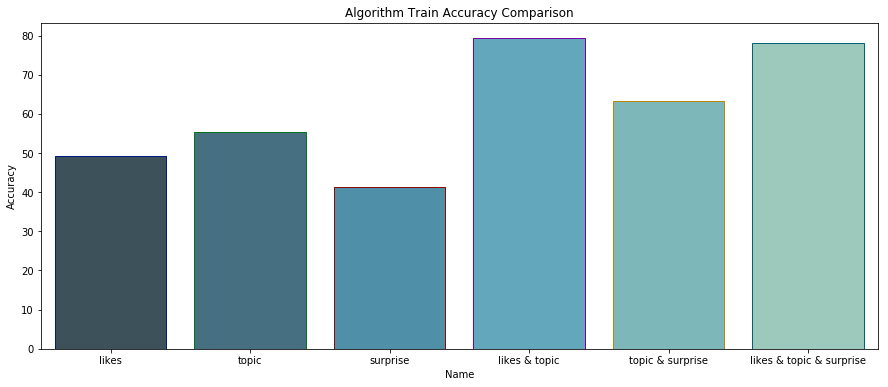

In [146]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=Average_RF,palette='GnBu_d',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

In [127]:
rating_r1 = pd.DataFrame({
    "Name" : ['likes','topic','surprise','likes & topic & surprise','likes & topic & surprise & familiarity'],
    "Accuracy" : [33.33,34.66,27.33,42.66,40]
})
rating_r1.dtypes

Name         object
Accuracy    float64
dtype: object

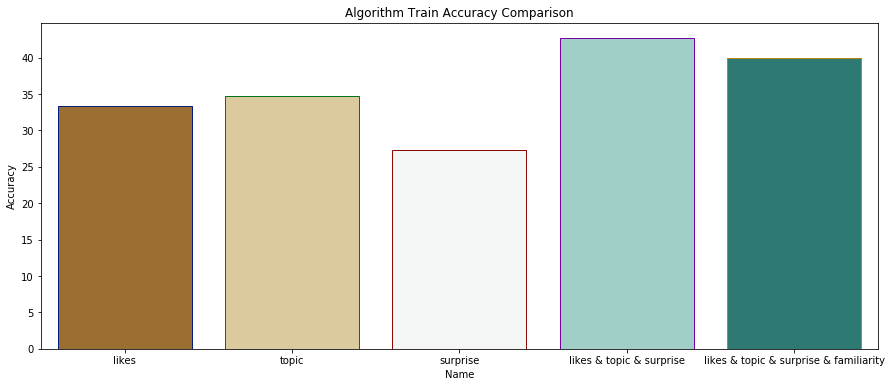

In [153]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=rating_r1,palette='BrBG',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

In [137]:
rating_r2 = pd.DataFrame({
    "Name" : ['topic','surprise','likes & topic & surprise','likes'],
    "Accuracy" : [28,22,38,34]
})
rating_r2.dtypes

Name        object
Accuracy     int64
dtype: object

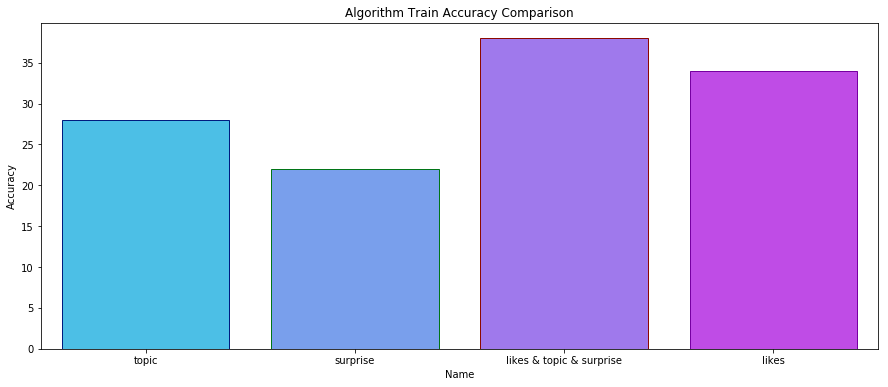

In [150]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=rating_r2,palette='cool',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

In [139]:
rating_r3 = pd.DataFrame({
    "Name" : ['topic','surprise','likes & topic & surprise','likes'],
    "Accuracy" : [29.33,24.66,37.33,32]
})
rating_r3.dtypes

Name         object
Accuracy    float64
dtype: object

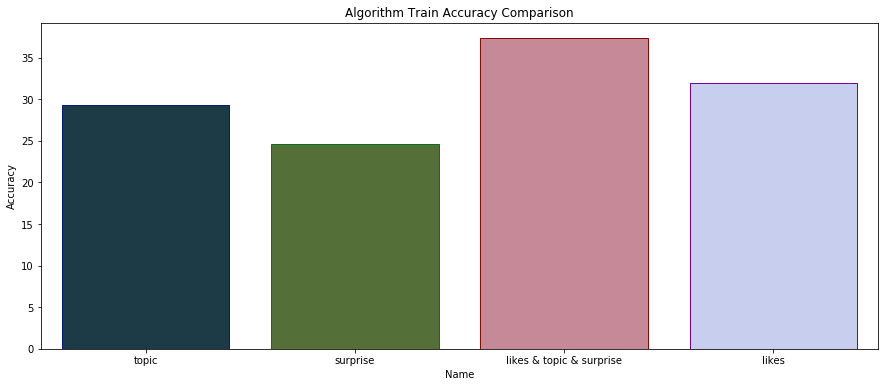

In [157]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=rating_r3,palette='cubehelix',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Train Accuracy Comparison')
plt.show()

In [298]:
decision_tree = pd.DataFrame({
    "Name" : ['likes','likes + topic + surprise','likes + topic + Familiarity + surprise'],
    "Accuracy" : [34.6,58.4,69.5]
})
decision_tree.dtypes

Name         object
Accuracy    float64
dtype: object

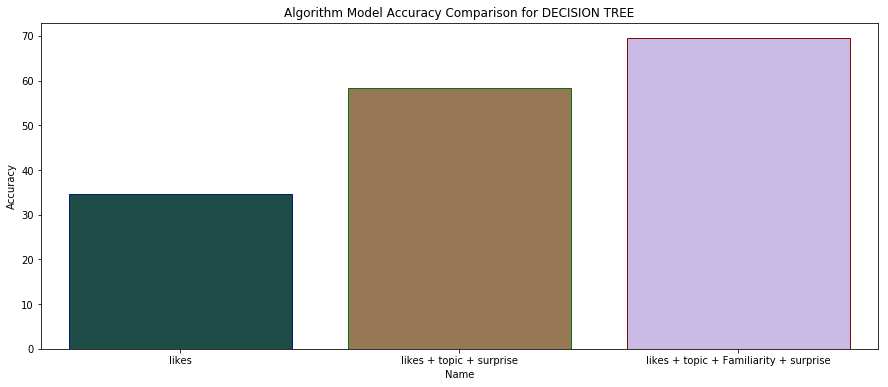

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=decision_tree,palette='cubehelix',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Model Accuracy Comparison for DECISION TREE')
plt.show()

In [309]:
RF = pd.DataFrame({
    "Name" : ['likes','likes + topic + surprise','likes + topic + Familiarity + surprise'],
    "Accuracy" : [34.6,58.4,69.5]
})
RF.dtypes

Name         object
Accuracy    float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=RF,palette='coolwarm',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Model Accuracy Comparison for DECISION TREE')
plt.show()

In [310]:
RF1 = pd.DataFrame({
    "Name" : ['surprise','surprise + topic','Average likes + surprise + topic'],
    "Accuracy" : [38,65.33,64]
})
RF1.dtypes

Name         object
Accuracy    float64
dtype: object

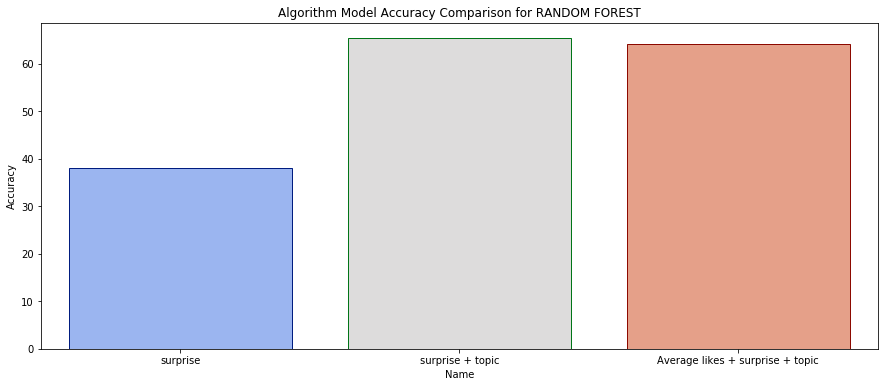

In [311]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Accuracy",data=RF1,palette='coolwarm',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=0)
plt.title('Algorithm Model Accuracy Comparison for RANDOM FOREST')
plt.show()

In [176]:
second.head()

,article_id,link,title,main_category,category_1,category_2,category_3,category_4,surprise_ratings,like_ratings,...,level,associ,year,one,high,find,percent,food,develop,diet
0,9432,http://www.medicalnewstoday.com/articles/14131...,Depression also a problem in patients with Par...,Depression,Depression,NaN,NaN,NaN,3,4,...,0,0,0,0,0,0,0,0,0,0
1,17114,http://www.medicalnewstoday.com/articles/23226...,Testing new manic depression drugs in slime mo...,Depression,Depression,NaN,NaN,NaN,5,5,...,0,0,0,0,0,0,0,0,6,0
2,388,http://www.medicalnewstoday.com/articles/4063.php,Dietary cocktail reduces cancer deaths,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,4,...,0,0,9,0,0,0,0,0,0,10
3,1650,http://www.medicalnewstoday.com/articles/5331.php,Super smoking addicts see cigarettes as their pal,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,3,...,0,0,0,0,0,0,0,0,0,0
4,1850,http://www.medicalnewstoday.com/articles/5533.php,How to reduce your chances of developing colon...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,3,3,...,6,0,0,0,7,0,0,0,8,9
